## Exploratary Data Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
## Here we try to predict the number of people survived or not
## since the outcome is Binary we can use logistic Reg or any other classification models

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train.nunique()   ## displays to number of unique values

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
train.values  ## values used to convert the dataframe into array format

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
mean = train.Age.mean()

In [10]:
train[train.isnull().any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [11]:
#### Imputation of Age with its mean

train['Age'] = train['Age'].fillna(mean)

In [12]:
train.Age.isnull().sum()

0

In [13]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
train.shape

(891, 12)

In [15]:
train.info()  ## age, cabin and embarked are having null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### In this EDA we rename the variables, drop the unwanted variables, 
convert the type of variables,

Impute the NaN values or drop them, 

find the duplicated values and remove them, 

apply transformations on data

Detect the outliers and perfrom accordingly, 

make our data normal or standardize the data,

finding the correlation between the variables and also find the variables which are significant to our prediction


In [17]:
train[['PassengerId','Survived']].to_csv('predict.csv', index = False)  ## this will create a new csv file with two columns

In [18]:
train1 = train.copy()
train1.Age.isnull().sum()

0

In [19]:
train1['Age'] =  train1['Age'].astype('int32')   ## tppe conversion float to int
train1.Age.head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int32

In [20]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

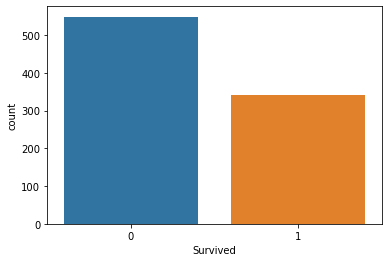

In [26]:
### Visual EDA

sns.countplot(train1.Survived)  ## From this we can see that less people 

In [27]:
train1.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

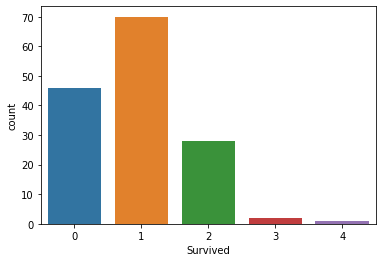

In [28]:
sns.countplot(train1.groupby(['Cabin']).Survived.sum())

<AxesSubplot:xlabel='Sex', ylabel='count'>

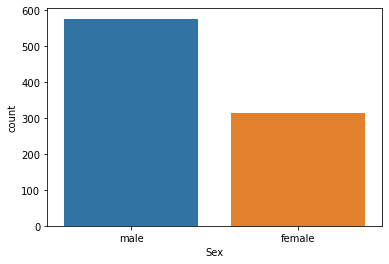

In [29]:
sns.countplot('Sex', data= train1)

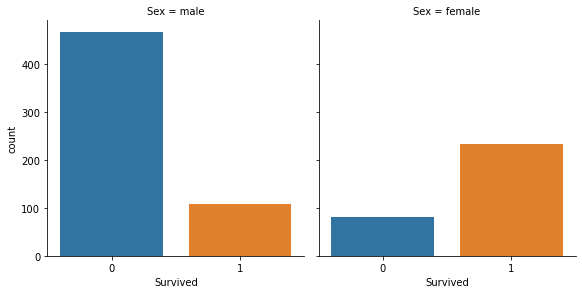

In [39]:

sns.factorplot(x = 'Survived', col = 'Sex', kind ='count', data = train1, height = 4, aspect = 1)  
### females survived more than males

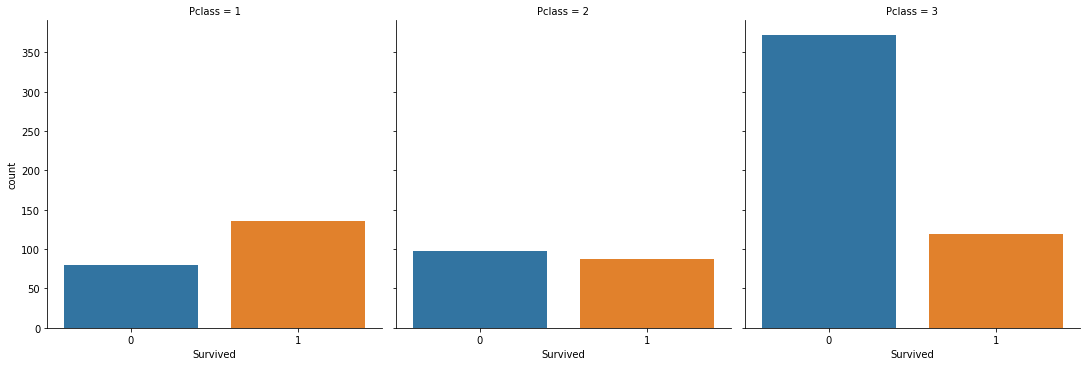

In [31]:
sns.factorplot(x = 'Survived',col = 'Pclass', kind='count', data = train1)

## Passegers travelled in first class are more likely to survive

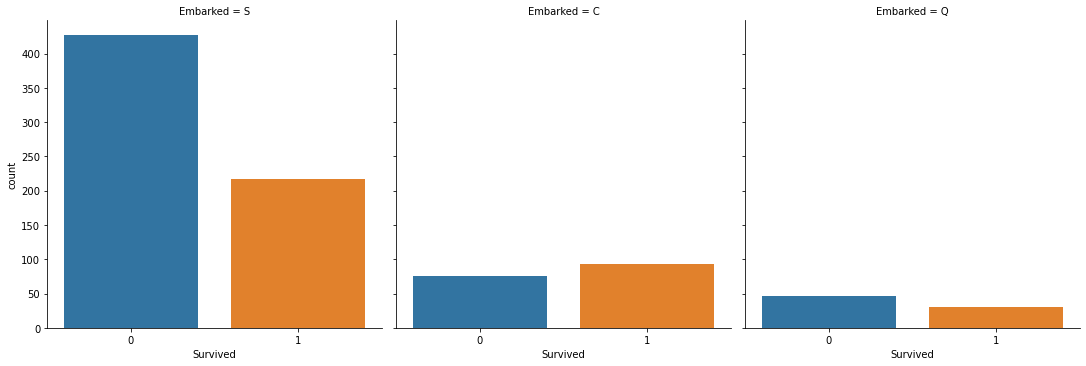

In [40]:
sns.factorplot(x = 'Survived', col = 'Embarked', kind = 'count', data = train1)

<AxesSubplot:xlabel='Age', ylabel='Density'>

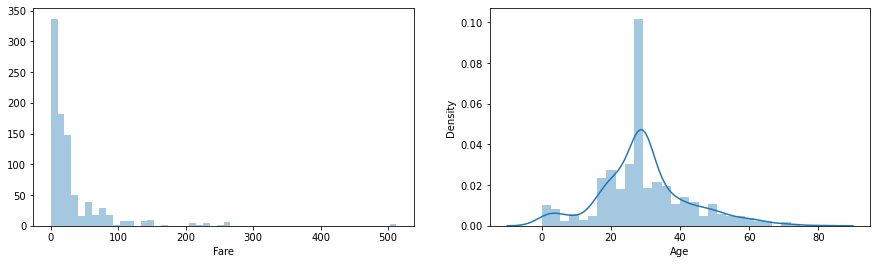

In [43]:
### EDA with numverical data
fig= plt.subplots(nrows = 2, ncols = 2, figsize = (15,4))
plt.subplot(1,2,1)
sns.distplot(train1.Fare, kde = False)

plt.subplot(1,2,2)
sns.distplot(train1.Age)




<AxesSubplot:xlabel='Survived', ylabel='Age'>

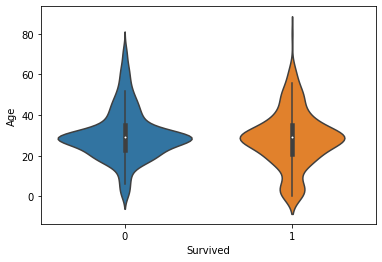

In [44]:
sns.violinplot(x = 'Survived', y = 'Age', data= train1)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

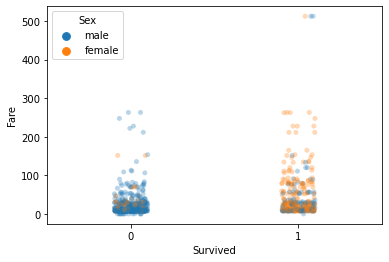

In [45]:
sns.stripplot(x='Survived', y = 'Fare', data = train1, alpha = 0.3, hue ='Sex')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

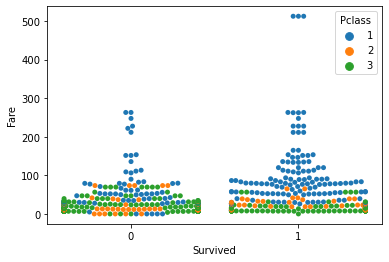

In [46]:
sns.swarmplot(x='Survived', y = 'Fare', data = train1, hue = 'Pclass')

In [47]:
train1.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


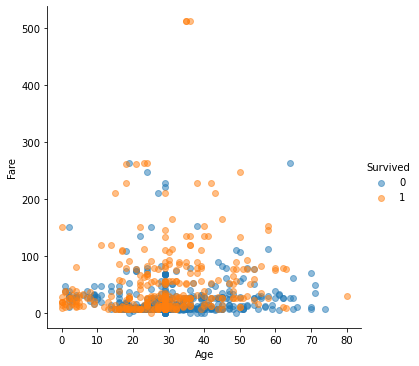

In [48]:
sns.lmplot(x = 'Age', y ='Fare', hue = 'Survived', data = train1, fit_reg = False, scatter_kws = {'alpha':0.5})

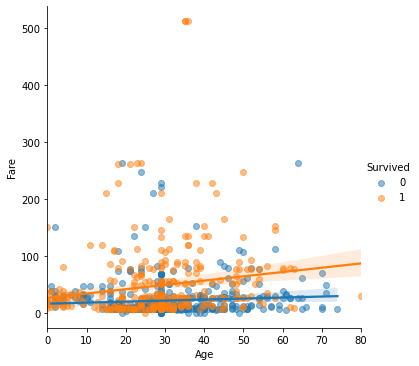

In [49]:
sns.lmplot(x = 'Age', y ='Fare', hue = 'Survived', data = train1, fit_reg = True, scatter_kws = {'alpha':0.5})

In [ ]:
sns.pairplot(train1)

In [51]:
train1['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [52]:
train1.Embarked.isnull().sum()

2

In [53]:
train1 =pd.get_dummies(train1, columns=['Sex'], drop_first = True)  
## here we are creating dummy of one 1 variable in sex becoz male and female dummies gives the same information

In [54]:
data = train1[['Sex_male','Fare','Age','Pclass','SibSp']]

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  891 non-null    uint8  
 1   Fare      891 non-null    float64
 2   Age       891 non-null    int32  
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
dtypes: float64(1), int32(1), int64(2), uint8(1)
memory usage: 25.4 KB


In [56]:
x = data.values
y = train1.Survived
print(x.shape, y.shape)

(891, 5) (891,)


In [57]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [58]:
xtrain, xtest,ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [59]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((712, 5), (712,), (179, 5), (179,))

In [60]:
## Building Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [61]:
y_pred_train = clf.predict(xtrain)
y_pred = clf.predict(xtest)
pd.Series(y_pred).value_counts()

0    109
1     70
dtype: int64

In [62]:
train_acc = clf.score(xtrain, ytrain)
train_acc

0.8174157303370787

In [63]:
np.mean(y_pred == ytest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       102
           1       0.87      0.79      0.83        77

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.86       179
weighted avg       0.86      0.86      0.86       179



In [64]:
print(classification_report(ytrain, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       447
           1       0.79      0.69      0.74       265

    accuracy                           0.82       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.82      0.82      0.81       712



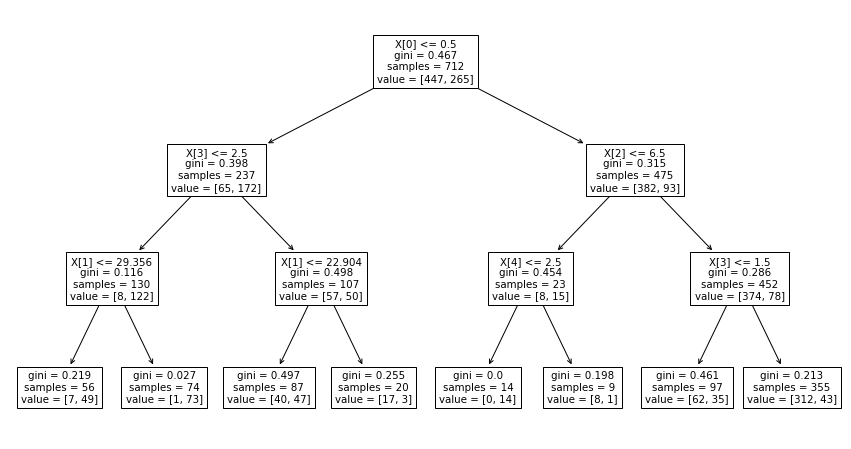

In [65]:
## plotting the decision tree for our model 
fig = plt.subplots(figsize= (15,8))
tree.plot_tree(clf);


[Text(418.5, 380.52, 'Sex_male <= 0.5\ngini = 0.467\nsamples = 712\nvalue = [447, 265]\nclass = not alive'),
 Text(209.25, 271.8, 'Pclass <= 2.5\ngini = 0.398\nsamples = 237\nvalue = [65, 172]\nclass = Survived'),
 Text(104.625, 163.07999999999998, 'Fare <= 29.356\ngini = 0.116\nsamples = 130\nvalue = [8, 122]\nclass = Survived'),
 Text(52.3125, 54.360000000000014, 'gini = 0.219\nsamples = 56\nvalue = [7, 49]\nclass = Survived'),
 Text(156.9375, 54.360000000000014, 'gini = 0.027\nsamples = 74\nvalue = [1, 73]\nclass = Survived'),
 Text(313.875, 163.07999999999998, 'Fare <= 22.904\ngini = 0.498\nsamples = 107\nvalue = [57, 50]\nclass = not alive'),
 Text(261.5625, 54.360000000000014, 'gini = 0.497\nsamples = 87\nvalue = [40, 47]\nclass = Survived'),
 Text(366.1875, 54.360000000000014, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]\nclass = not alive'),
 Text(627.75, 271.8, 'Age <= 6.5\ngini = 0.315\nsamples = 475\nvalue = [382, 93]\nclass = not alive'),
 Text(523.125, 163.07999999999998, 

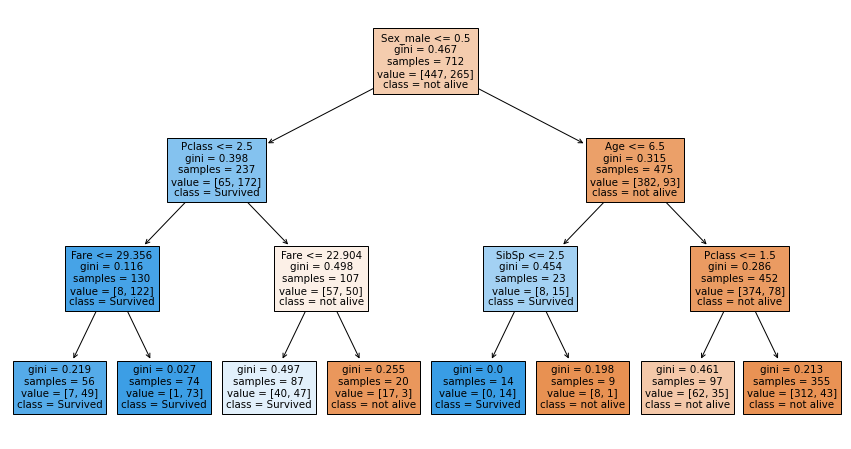

In [73]:
fn = ['Sex_male','Fare','Age','Pclass','SibSp']
cn = ['not alive','Survived']
fig = plt.subplots(figsize = (15,8))
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True)

Text(0, 0.5, 'Accuracy')

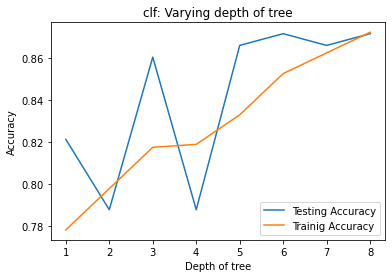

In [87]:
## Setup array to store train and test accuracies
dep = np.arange(1,9)
train_acc = np.empty(len(dep))
test_acc =np.empty(len(dep))

## Loop over different values of k
for i, k in enumerate(dep):
    ## Setup a KNN classifier with k neighbors: KNN
    clf1 = DecisionTreeClassifier(max_depth = k)
    ## fit the classifier to the training data
    clf1.fit(xtrain, ytrain)
    
    ## compute accuracies on train and test data
    train_acc[i] = clf1.score(xtrain, ytrain)
    test_acc[i]= clf1.score(xtest,ytest)
    
    
## Generate plot

plt.title('clf: Varying depth of tree')
plt.plot(dep, test_acc, label ='Testing Accuracy')
plt.plot(dep, train_acc, label = 'Trainig Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
#plt.show()

## Training acc is going up and up but testing acc is decreasing as we are increasing the no.of depths
## with this we can say the our is model is overfitting

###  Feature Engineering

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
features = train.copy()

In [90]:
survived = features.Survived

In [91]:
features = features.drop('Survived', axis = 1)
features.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [92]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [93]:
features.Name.tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [94]:
## Extract Title form Name, store in column and plot barplot
## one upper character, one lower character, one dot
import re
features['Title'] = features.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
features.Title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [95]:
features.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Jonkheer')])

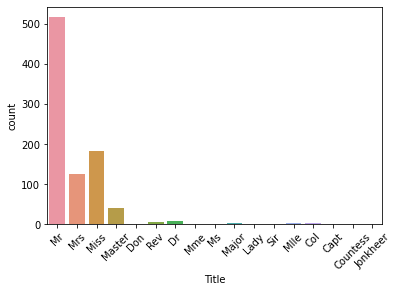

In [96]:
sns.countplot(x='Title', data=features)
plt.xticks(rotation = 45)

In [97]:
## substitute some title with their English form
features['Title'] = features['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs','Ms':'Miss'})

## Gather exceptions
features['Title'] = features['Title'].replace(['Don','Dona','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer'],'Special')

In [98]:
features.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Special'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

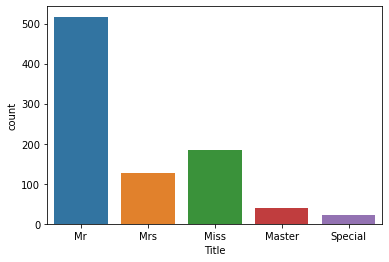

In [99]:
sns.countplot(x='Title', data = features)

In [100]:
features[['Name','PassengerId','Ticket','Cabin']].head()

,Name,PassengerId,Ticket,Cabin
0,"Braund, Mr. Owen Harris",1,A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,PC 17599,C85
2,"Heikkinen, Miss. Laina",3,STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,113803,C123
4,"Allen, Mr. William Henry",5,373450,NaN


In [101]:
### Did they have a Cabin?
## Return True is the passenger has a cabin
features['Has_cabin'] = ~features.Cabin.isnull()

features[['Name','PassengerId','Ticket','Cabin','Has_cabin']].head()

,Name,PassengerId,Ticket,Cabin,Has_cabin
0,"Braund, Mr. Owen Harris",1,A/5 21171,NaN,False
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,PC 17599,C85,True
2,"Heikkinen, Miss. Laina",3,STON/O2. 3101282,NaN,False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,113803,C123,True
4,"Allen, Mr. William Henry",5,373450,NaN,False


In [102]:
## Drop columns except Has_cabin in the actual data
features.drop(['Name','PassengerId','Ticket','Cabin',], axis =1, inplace = True)
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_cabin
0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,female,35.0,1,0,53.1000,S,Mrs,True
4,3,male,35.0,0,0,8.0500,S,Mr,False


In [103]:
### features which are not useful for our model building has dropped

In [104]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    object 
 2   Age        891 non-null    float64
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   Embarked   889 non-null    object 
 7   Title      891 non-null    object 
 8   Has_cabin  891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB


In [105]:
features['Embarked'] = features['Embarked'].fillna('S')

In [106]:
## Binning Numerical Data
## q=4 means 4 quantiles 0,1,2,3
## labels = False are numbers not characters

features['catAge'] = pd.qcut(features.Age, q=4, labels = False)
features['catFare'] = pd.qcut(features.Fare, q=4, labels = False)
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_cabin,catAge,catFare
0,3,male,22.0,1,0,7.2500,S,Mr,False,0,0
1,1,female,38.0,1,0,71.2833,C,Mrs,True,3,3
2,3,female,26.0,0,0,7.9250,S,Miss,False,1,1
3,1,female,35.0,1,0,53.1000,S,Mrs,True,2,3
4,3,male,35.0,0,0,8.0500,S,Mr,False,2,1


In [107]:
## Drop Age and fare columns

features = features.drop(['Fare','Age'], axis = 1)
features.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_cabin,catAge,catFare
0,3,male,1,0,S,Mr,False,0,0
1,1,female,1,0,C,Mrs,True,3,3
2,3,female,0,0,S,Miss,False,1,1
3,1,female,1,0,S,Mrs,True,2,3
4,3,male,0,0,S,Mr,False,2,1


In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
### create a bew column, which is the number of members families that were onboard of the titanic

features['Famsize'] = features.Parch + features.SibSp

## drop columns
features = features.drop(['SibSp','Parch'], axis = 1)
features.head()

,Pclass,Sex,Embarked,Title,Has_cabin,catAge,catFare,Famsize
0,3,male,S,Mr,False,0,0,1
1,1,female,C,Mrs,True,3,3,1
2,3,female,S,Miss,False,1,1,0
3,1,female,S,Mrs,True,2,3,1
4,3,male,S,Mr,False,2,1,0


In [110]:
### Transforming all variables to numerical vars
# Has_cabin is a boolean
# Sex becomes Sex_Male = 1 or 0
# the former vars are dropped, only the later vars remain

features_dum = pd.get_dummies(features, drop_first = True)
features_dum.head()

,Pclass,Has_cabin,catAge,catFare,Famsize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,False,0,0,1,1,0,1,0,1,0,0
1,1,True,3,3,1,0,0,0,0,0,1,0
2,3,False,1,1,0,0,0,1,1,0,0,0
3,1,True,2,3,1,0,0,1,0,0,1,0
4,3,False,2,1,0,1,0,1,0,1,0,0


In [111]:
train = features_dum.iloc[:891]
test = features_dum.iloc[-891:]

## transform into arrays 
xtrain = train.values
xtest = test.values

y = survived.values

In [112]:
test.shape

(891, 12)

In [113]:
## Building decision tree algo using Grid SearchCV

dep = np.arange(1,9)
param_grid = {'max_depth': dep}

clf = DecisionTreeClassifier()
clf_cv = GridSearchCV(clf, param_grid = param_grid, cv = 5)

clf_cv.fit(xtrain, y)

print('Tuned Decision Tree Parameters: {}'.format(clf_cv.best_params_))
print('Best score is {}'.format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 3}
Best score is 0.8293766869625259


In [117]:
y_pred = clf_cv.predict(xtest)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.78      0.75      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891

